In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm, rcParams


In [2]:
#线性回归

# 1.获取数据
boston = load_boston()  # 获取波士顿房价的数据
x = boston.data[:, :]  # 取数据第五列为 x 的值
y = boston.target  # 取 y 值
print(type(boston),type(x))

<class 'sklearn.utils.Bunch'> <class 'numpy.ndarray'>


In [3]:
#数据无量纲化 采用z-score数据标准化
x_mean=np.sum(x,axis=0)/x.shape[0] #x_mean=x.mean
a=np.power(x-x_mean,2)
#print(x_mean,"\n",x.mean(axis=0))
print((x-x_mean)*(x-x_mean))#np.power(x-x_mean,2)
x_std=np.sqrt(np.sum(a/x.shape[0]))
x=(x-x_mean)/x_std

[[1.30119175e+01 4.40413223e+01 7.79120214e+01 ... 9.95739228e+00
  1.61812853e+03 5.88758995e+01]
 [1.28609277e+01 1.29132231e+02 1.65386886e+01 ... 4.29724297e-01
  1.61812853e+03 1.23416133e+01]
 [1.28610711e+01 1.29132231e+02 1.65386886e+01 ... 4.29724297e-01
  1.30725405e+03 7.43572197e+01]
 ...
 [1.26221289e+01 1.29132231e+02 6.29200100e-01 ... 6.47430928e+00
  1.61812853e+03 4.91830560e+01]
 [1.22775504e+01 1.29132231e+02 6.29200100e-01 ... 6.47430928e+00
  1.35247185e+03 3.81067098e+01]
 [1.27171659e+01 1.29132231e+02 6.29200100e-01 ... 6.47430928e+00
  1.61812853e+03 2.27821327e+01]]


'feature_names': array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT']

In [4]:
# 2.训练模型
#from sklearn.linear_model import LinearRegression
#model2 = LinearRegression().fit(x, y)
#划分训练集和测试集
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state = 0)
#将数据转换成numpy矩阵
x_train=np.matrix(x_train)
y_train=np.matrix(y_train)
x_test=np.matrix(x_test)
y_test=np.matrix(y_test)
# 初始化theta矩阵
theta = np.matrix([0,0,0,0,0,0,0,0,0,0,0,0,0,0])
x_train.shape,x_test.shape,y_train.shape,y_test.shape,theta.shape

#添加偏置列(常数项)
x_train = np.insert(x_train, 0, 1, axis=1) 
x_test = np.insert(x_test, 0, 1, axis=1)
x_train.shape,x_test.shape,y_train.shape,y_test.shape,theta.shape

((379, 14), (127, 14), (1, 379), (1, 127), (1, 14))

In [5]:
#生成随机数组
import random
def GetRandomArray(min,max,num):
    ls=random.sample(range(min,max),num)
    ls.sort()
    print(ls)
    return ls

In [6]:
# 代价函数
def CostFunction(x,y,theta):
    inner = np.power(x*theta.T-y, 2)
    inner1 = (x*theta.T-y).T*(x*theta.T-y)
    return np.sum(inner)/2*(len(x))#,inner1/2*len(x)

In [7]:
# 正则化代价函数
def regularizedcost(x,y,theta,l):
    reg = (l/(2*len(x)))*(np.power(theta, 2).sum())    
    return CostFunction(x,y,theta) + reg

In [8]:
# 梯度下降
def GradientDescent(x,y,theta,l,alpha,epoch):
    #x为特征值，y为预测目标，theta为模型参数，l为正则化参数，alpha为学习速率，epoch为迭代次数
    temp = np.matrix(np.zeros(np.shape(theta)))   # 定义临时矩阵存储tehta
    cost = np.zeros(epoch)  # 初始化一个ndarray，包含每次epoch的cost
    m = x.shape[0]  # 样本数量m
    for i in range(epoch):
       # derivatives=np.sum((x .dot(theta)-y ,axis=0)/m
        # 利用向量化一步求解
        temp = theta - (alpha / m) * (x * theta.T - y).T * x# - (alpha*l/m)*theta     # 添加了正则项
       # temp = theta - alpha*derivatives
        theta = temp
        cost[i] = CostFunction(x, y, theta)      # 记录每次迭代后的代价函数值
    
    return theta,cost   

In [9]:
alpha = 0.01  #学习速率
epoch = 1000 #迭代步数
l = 50      #正则化参数
final_theta, cost = GradientDescent(x_train, y_train, theta, l, alpha, epoch)
print(final_theta,final_theta.shape,theta.shape)

[[ 1.84988652e+01 -5.36868205e-03  2.48195630e-02 ...  5.93906834e-03
   1.62292730e-02  1.41493111e-03]
 [ 1.95987977e+01 -5.68790098e-03  2.62953208e-02 ...  6.29220213e-03
   1.71942568e-02  1.49906215e-03]
 [ 3.31979634e+01 -9.63460778e-03  4.45410535e-02 ...  1.06582199e-02
   2.91249656e-02  2.53922772e-03]
 ...
 [ 1.91988222e+01 -5.57182137e-03  2.57586816e-02 ...  6.16378984e-03
   1.68433536e-02  1.46846905e-03]
 [ 1.65989817e+01 -4.81730389e-03  2.22705268e-02 ...  5.32910997e-03
   1.45624828e-02  1.26961386e-03]
 [ 2.30985830e+01 -6.70359758e-03  3.09909138e-02 ...  7.41580965e-03
   2.02646598e-02  1.76675182e-03]] (379, 14) (1, 14)


In [10]:
# 模型评估
y_hat_train = x_train * final_theta.T
y_hat_test = x_test * final_theta.T
mse = np.sum(np.power(y_hat_test-y_test.T,2))/(len(x_test))
rmse = np.sqrt(mse)
R2_train = 1 - np.sum(np.power(y_hat_train - y_train.T,2))/np.sum(np.power(np.mean(y_train) - y_train,2))
R2_test = 1 - np.sum(np.power(y_hat_test - y_test.T,2))/np.sum(np.power(np.mean(y_test) - y_test,2))
print('MSE = ', mse)
print('RMSE = ', rmse)
print('R2_train = ', R2_train)
print('R2_test = ', R2_test)

MSE =  63315.831123093776
RMSE =  251.62637207394175
R2_train =  -756.9259490024081
R2_test =  -773.9889124565909


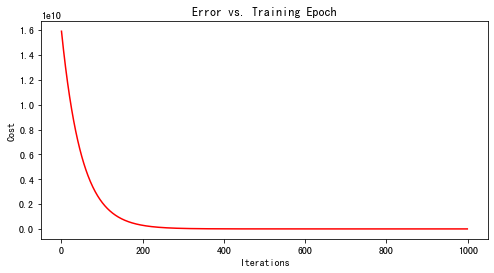

In [11]:
# 绘制迭代曲线
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(np.arange(epoch), cost, 'r')  # np.arange()返回等差数组
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

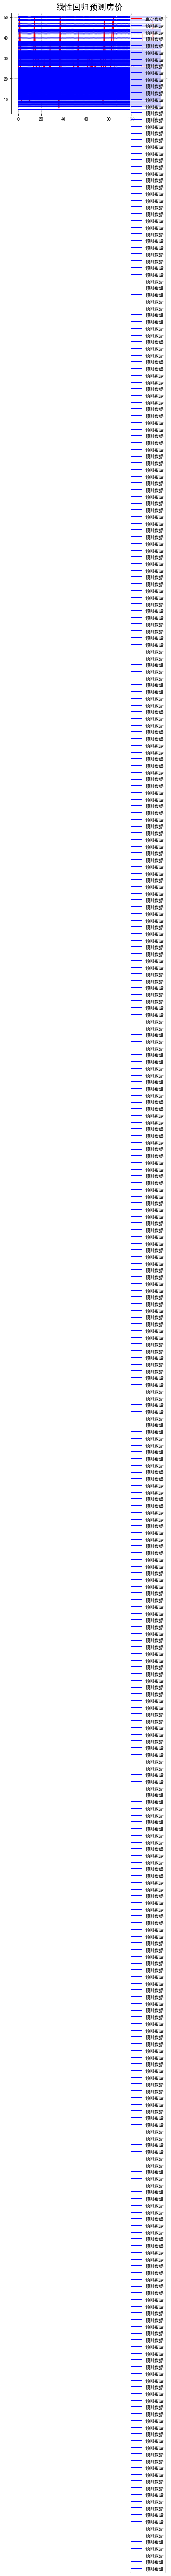

In [12]:
# 图例展示预测值与真实值的变化趋势
from matplotlib import font_manager as fm, rcParams
plt.rcParams['font.sans-serif']=['SimHei'] #显示中文标签
plt.rcParams['axes.unicode_minus']=False 
plt.figure(facecolor='w')
t = np.arange(len(x_test))  #创建等差数组
plt.plot(t, y_test.T, 'r-', linewidth=2, label=u'真实数据')
plt.plot(t, y_hat_test, 'b-', linewidth=2, label=u'预测数据')
plt.legend(loc='upper right')
plt.title(u'线性回归预测房价', fontsize=18)
plt.grid(b=True, linestyle='--')